<h1> CS 595 - Interactive Machine Learning </h1>
<h2> Assignment 3 - Decision Tree Transparency</h2>
<h2>Rohan Digambar Gawade.</h2>
<h2>A20379951</h2>

<h1><b>DataSet: Bank Direct Marketing DataSet</b></h1>
<h2>Description:</h2> The dataset contains the clients information collected through campaign by portueguese bank institution, so that we would know which clients the bank should target so that the clients will subscribe to the long term deposit scheme  of the bank.
<br>
The dataset consist of 20 attributes and one class label which is the binary valued attribute indicating whether the client has subscribe the scheme or not.
<br>
The dataset has around 41188 records. 
<h2>Features :
Clients Data</h2>
1 - age (numeric)<br>
2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")<br>
3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)<br>
4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")<br>
5 - default: has credit in default? (categorical: "no","yes","unknown")<br>
6 - housing: has housing loan? (categorical: "no","yes","unknown")<br>
7 - loan: has personal loan? (categorical: "no","yes","unknown")
<h2>Features related to the last contact of the current campaign</h2>
8 - contact: contact communication type (categorical: "cellular","telephone")<br> 
9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")<br>
11 - duration: last contact duration, in seconds (numeric).
<h2>Other Features</h2>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
<h2>Social and economic context attributes</h2>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)     <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)
<h2>Output variable (desired target):</h2>
21 - y - has the client subscribed a term deposit? (binary: "yes","no")<br>
<b>Dataset source:</b> http://archive.ics.uci.edu/ml/datasets/Bank+Marketing <br>
<b>Citation:</b> S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image 
import pydotplus 
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import cross_val_score


In [2]:
# IMPORTING DATASET
df_bank_addi = pd.read_csv("bank-additional-full.csv",";")

In [3]:
df_bank_addi.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h2> Data Preprocessing </h2>

In [4]:
# Removing the missing rows filled with unknown values
before_rem = df_bank_addi.shape[0]
df_bank_addi = df_bank_addi[df_bank_addi.contact != 'unknown'] 
df_bank_addi = df_bank_addi[df_bank_addi.job != 'unknown'] 
df_bank_addi = df_bank_addi[df_bank_addi.marital != 'unknown']
df_bank_addi = df_bank_addi[df_bank_addi.education != 'unknown']
df_bank_addi = df_bank_addi[df_bank_addi.default != 'unknown']
df_bank_addi = df_bank_addi[df_bank_addi.housing != 'unknown']
df_bank_addi = df_bank_addi[df_bank_addi.loan != 'unknown']
df_bank_addi = df_bank_addi[df_bank_addi.month != 'unknown']
df_bank_addi = df_bank_addi[df_bank_addi.day_of_week != 'unknown']

Number of rows before and after removing missing values marked with unknown


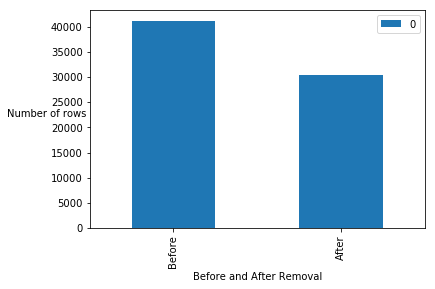

In [5]:
after_rem = df_bank_addi.shape[0]
featurelist = list(['Before','After'])
featureval = list([before_rem,after_rem])
print("Number of rows before and after removing missing values marked with unknown")    
df_list = pd.DataFrame(featureval,featurelist)
df_list.plot.bar()
plt.xlabel('Before and After Removal')
plt.ylabel('Number of rows',rotation='0')
plt.show()

In [6]:
print(df_bank_addi['y'].value_counts())

no     26629
yes     3859
Name: y, dtype: int64


As we can see that the binary classes are very unbalanced. This will make the classifier more biased towards the y= 'no' class. So to make the class balanced we will downsample the majority class.

In [7]:
#Down Sampling majority class to 3859
df_majority = df_bank_addi[df_bank_addi.y == 'no']
df_minority = df_bank_addi[df_bank_addi.y == 'yes']

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=3859,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_bank = pd.concat([df_majority_downsampled, df_minority])
df_bank.head()
# Display new class counts
df_bank.y.value_counts()

no     3859
yes    3859
Name: y, dtype: int64

In [8]:
depth_list = []
accuracy_train =[]
accuracy_test=[]

In [9]:
transform_list=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_bank = pd.get_dummies(df_bank,columns=transform_list,prefix=transform_list)

In [10]:
#Ordering Features
colslist = list(df_bank.columns.values) 
colslist.pop(colslist.index('y')) 
df_bank = df_bank[colslist+['y']]

#Get List of Features
features = list(df_bank.columns[:-1])
#Target
target = df_bank.columns[-1]

X = df_bank[features]
Y = df_bank[target]

#Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [12]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33, random_state = 0)

In [13]:
# Defining function to plot the Area under ROC Curve for the training set
def plotAUC(YTRAIN,YPRED,YTEST,YPRED_TEST):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(YTRAIN,YPRED)
    fpr_test, tpr_test, thresholds_test = roc_curve(YTEST,YPRED_TEST)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.plot(fpr_test, tpr_test, 'g',
    label='AUC_TEST = %0.2f'% roc_auc_test)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

<h1> Decision Tree Classifier with Depth = 1</h1>

In [14]:
#Decision Tree Classifier
dt_estimator = DecisionTreeClassifier(max_depth=1)
#fit the data
dt_estimator.fit(X_train,y_train)
#Predict
Y_pred = dt_estimator.predict(X_train)

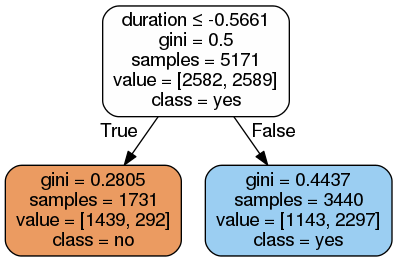

In [15]:
label = ['no','yes']
dot_data = tree.export_graphviz(dt_estimator, out_file=None, 
                         feature_names=features,  
                         class_names=label,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [16]:
print(" Train Accuracy(Depth = 1) \t=",metrics.accuracy_score(y_train,Y_pred))

 Train Accuracy(Depth = 1) 	= 0.722490814156


 Test Accuracy(Depth = 1) 	= 0.720062819003


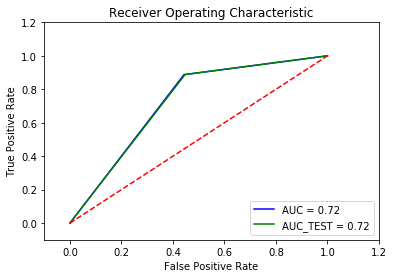

In [17]:
Y_pred_test = dt_estimator.predict(X_test)
print(" Test Accuracy(Depth = 1) \t=",metrics.accuracy_score(y_test,Y_pred_test))

depth_list.append(1)
accuracy_train.append(metrics.accuracy_score(y_train,Y_pred))
accuracy_test.append(metrics.accuracy_score(y_test,Y_pred_test))
plotAUC(y_train,Y_pred,y_test,Y_pred_test)

<h1>Decision Tree Classifier with Depth = 2</h1>

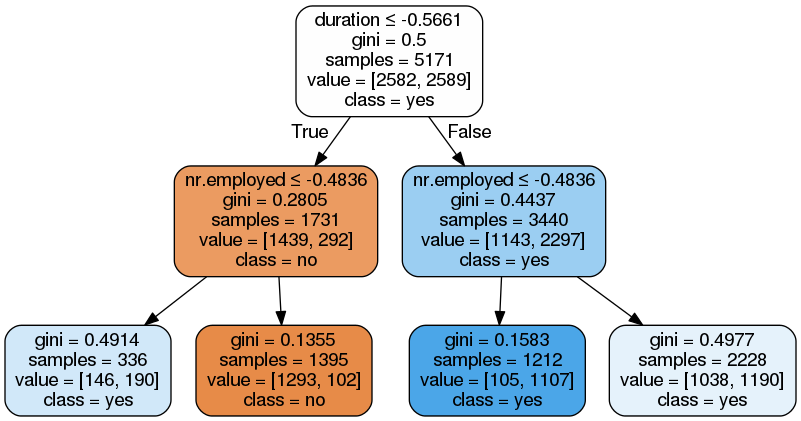

In [18]:
#Decision Tree Classifier
dt_estimator = DecisionTreeClassifier(max_depth=2)
#fit the data
dt_estimator.fit(X_train,y_train)
#Predict
Y_pred = dt_estimator.predict(X_train)
dot_data = tree.export_graphviz(dt_estimator, out_file=None, 
                         feature_names=features,  
                         class_names=label,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [19]:
print(" Train Accuracy(Depth = 2) \t=",metrics.accuracy_score(y_train,Y_pred))
Y_pred_test = dt_estimator.predict(X_test)
print(" Test Accuracy(Depth = 2) \t=",metrics.accuracy_score(y_test,Y_pred_test))

depth_list.append(2)
accuracy_train.append(metrics.accuracy_score(y_train,Y_pred))
accuracy_test.append(metrics.accuracy_score(y_test,Y_pred_test))

 Train Accuracy(Depth = 2) 	= 0.730999806614
 Test Accuracy(Depth = 2) 	= 0.731056144484


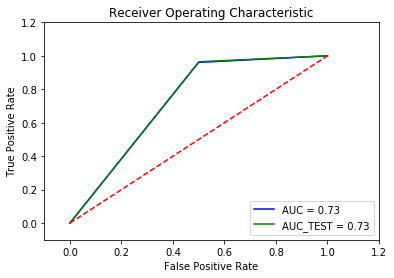

In [20]:
plotAUC(y_train,Y_pred,y_test,Y_pred_test)

<h1>Decision Tree Classifier with Depth = 3</h1>

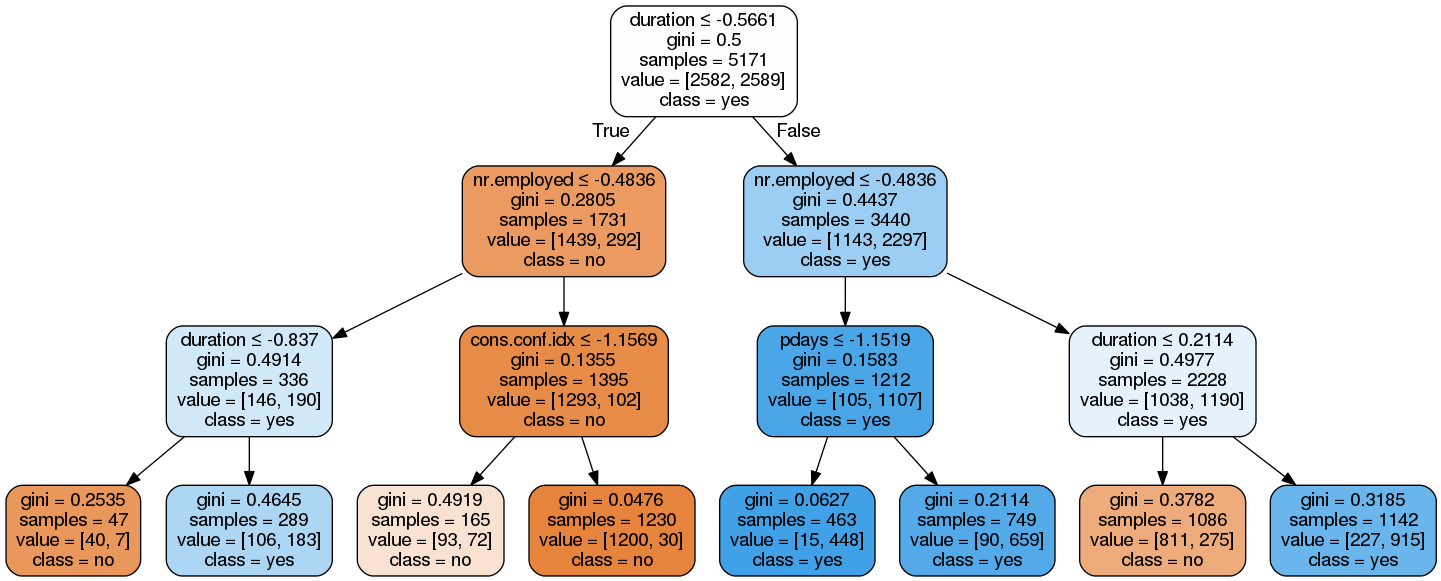

In [21]:
#Decision Tree Classifier
dt_estimator = DecisionTreeClassifier(max_depth=3)
#fit the data
dt_estimator.fit(X_train,y_train)
#Predict
Y_pred = dt_estimator.predict(X_train)
dot_data = tree.export_graphviz(dt_estimator, out_file=None, 
                         feature_names=features,  
                         class_names=label,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [22]:
print(" Train Accuracy(Depth = 3) \t=",metrics.accuracy_score(y_train,Y_pred))
Y_pred_test = dt_estimator.predict(X_test)
print(" Test Accuracy(Depth = 3) \t=",metrics.accuracy_score(y_test,Y_pred_test))
depth_list.append(3)
accuracy_train.append(metrics.accuracy_score(y_train,Y_pred))
accuracy_test.append(metrics.accuracy_score(y_test,Y_pred_test))


 Train Accuracy(Depth = 3) 	= 0.84103654999
 Test Accuracy(Depth = 3) 	= 0.847663918335


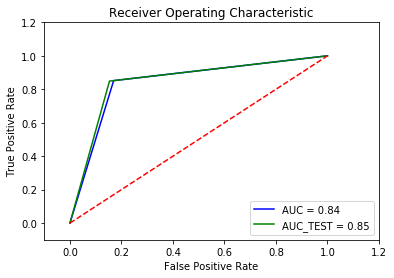

In [23]:
plotAUC(y_train,Y_pred,y_test,Y_pred_test)

<h1>Decision Tree Classifier with Depth = 4</h1>

In [24]:
#Decision Tree Classifier
dt_estimator = DecisionTreeClassifier(max_depth=4)
#fit the data
dt_estimator.fit(X_train,y_train)
#Predict
Y_pred = dt_estimator.predict(X_train)

print(" Train Accuracy(Depth = 4) \t=",metrics.accuracy_score(y_train,Y_pred))
Y_pred_test = dt_estimator.predict(X_test)
print(" Test Accuracy(Depth = 4) \t=",metrics.accuracy_score(y_test,Y_pred_test))

 Train Accuracy(Depth = 4) 	= 0.862889189712
 Test Accuracy(Depth = 4) 	= 0.873969375736


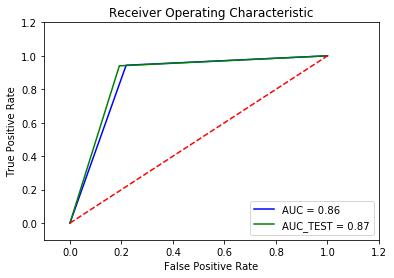

In [25]:
depth_list.append(4)
accuracy_train.append(metrics.accuracy_score(y_train,Y_pred))
accuracy_test.append(metrics.accuracy_score(y_test,Y_pred_test))
plotAUC(y_train,Y_pred,y_test,Y_pred_test)

<h1>Decision Tree Classifier with Depth = 5</h1>

In [26]:
#Decision Tree Classifier
dt_estimator = DecisionTreeClassifier(max_depth=5)
#fit the data
dt_estimator.fit(X_train,y_train)
#Predict
Y_pred = dt_estimator.predict(X_train)

print(" Train Accuracy(Depth = 5) \t=",metrics.accuracy_score(y_train,Y_pred))
Y_pred_test = dt_estimator.predict(X_test)
print(" Test Accuracy(Depth = 5) \t=",metrics.accuracy_score(y_test,Y_pred_test))

 Train Accuracy(Depth = 5) 	= 0.869270934055
 Test Accuracy(Depth = 5) 	= 0.874754613271


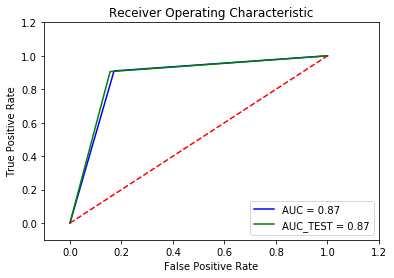

In [27]:
depth_list.append(5)
accuracy_train.append(metrics.accuracy_score(y_train,Y_pred))
accuracy_test.append(metrics.accuracy_score(y_test,Y_pred_test))
plotAUC(y_train,Y_pred,y_test,Y_pred_test)

<h1>Decision Tree Classifier with Depth = 6</h1>

 Train Accuracy(Depth = 6) 	= 0.884741829433
 Test Accuracy(Depth = 6) 	= 0.877502944641


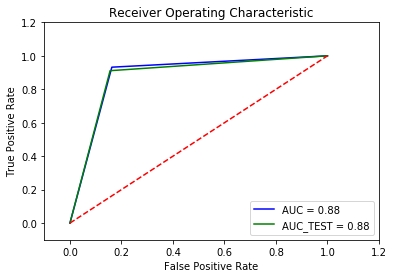

In [28]:
#Decision Tree Classifier
dt_estimator = DecisionTreeClassifier(max_depth=6)
#fit the data
dt_estimator.fit(X_train,y_train)
#Predict
Y_pred = dt_estimator.predict(X_train)

print(" Train Accuracy(Depth = 6) \t=",metrics.accuracy_score(y_train,Y_pred))
Y_pred_test = dt_estimator.predict(X_test)
print(" Test Accuracy(Depth = 6) \t=",metrics.accuracy_score(y_test,Y_pred_test))

depth_list.append(6)
accuracy_train.append(metrics.accuracy_score(y_train,Y_pred))
accuracy_test.append(metrics.accuracy_score(y_test,Y_pred_test))
plotAUC(y_train,Y_pred,y_test,Y_pred_test)

<h2>Performance Evaluation and Analysis</h2>

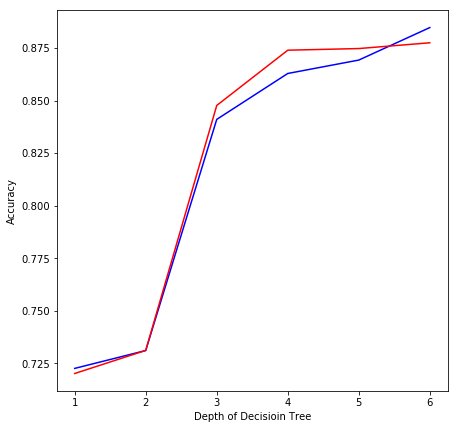

In [29]:
plt.figure(figsize=(7,7))
plt.plot(depth_list,accuracy_train,'b',
         label='Train accuracy')
plt.plot(depth_list,accuracy_test,'r',
         label='Test accuracy')    
plt.xlabel("Depth of Decisioin Tree")
plt.ylabel("Accuracy")
plt.show()


<ul>
<li>This experiment shows us about the transparency of the decision tree. We can see from the above graph that as we change the depth of the decision tree the accuracy changes as well<br>
<li>As we can see from the visualization of the decision trees at each depth, the feature 'duration' is selected for the first split. This is intuitively good as if the call duration = 0s, it means that the survey has not taken place and hence the target value is mostly no.<br>
<li>The AUC for the train data is followed by the test data as well for each of the depth. As the depth increases the ROC start approaching towards 1<br>
<li>When we plot the accuracy for the train(shown by blue graph) and test dataset(shown by red graph) we can see that our model behaves quite well for both the data set.
<li>With depth = 1 and 2, the accuracy is around 72-73% which is quite less. But as the depth increases and the model is able to learn more, the acccuracy increases as well. We can see an abrupt increase in accuracy from 73% when depth = 2 to 84% when depth = 3. Then the accuracy starts increasing gradually for the depth 4 and 5.
<li>As we can see from the above graph, as we go beyond depth = 5, the training accuracy starts increasing rapidly while the test accuracy is increases gradually. This is the point where the model starts overfitting.
<li>Thus as we change the parameter of the decision tree, we can see that the model starts behaving different with more accurate predictions.
</ul>